In [69]:
# Importing Basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
# Importing time series specific libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import bartlett
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace import sarimax
import prophet
from prophet import Prophet
from scipy.stats import levene
# Miscellaneous libararies
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from random import random

# Libaraies for evaluation of model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.arima.model import ARIMAResults


In [70]:
#TODO Cargar los datos de la hoja de calculo en el archivo "load_IJV.xlsx"
# Obtener la ruta absoluta del script de Python
def importar_datos(x):
    global df
    ruta_script = os.getcwd()
    #Nombre del archivo de Excel a cargar
    nombre_archivo = x
    # Combinar la ruta del script y el nombre del archivo
    ruta_archivo = os.path.join(ruta_script, nombre_archivo)
    # Cargar los datos del archivo de Excel en un DataFrame de pandas
    df = pd.read_excel(ruta_archivo)
    # Imprimir el df 
    return df
importar_datos('load_IJV.xlsx')
print(df)

     idprov                   fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  \
0     'IJV'  '01-May-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     'IJV'  '01-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     'IJV'  '27-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     'IJV'  '28-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4     'IJV'  '30-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...                     ...   ...   ...   ...   ...   ...   ...   ...   
3915  'IJV'  '14-Apr-2018 00:00:00'  15.0  14.0  13.0  13.0  13.0  13.0  13.0   
3916  'IJV'  '15-Apr-2018 00:00:00'  15.0  14.0  14.0  13.0  13.0  13.0  12.0   
3917  'IJV'  '16-Apr-2018 00:00:00'  14.0  13.0  13.0  13.0  12.0  13.0  12.0   
3918  'IJV'  '17-Apr-2018 00:00:00'  11.0  11.0  10.0  10.0  10.0  10.0  10.0   
3919  'IJV'  '18-Apr-2018 00:00:00'  12.0  11.0  11.0  10.0  10.0  11.0  11.0   

      dem8  ...  dem16  dem

In [71]:
#Identificar los valores únicos en la columna "idprov"
idprov_unique = df["idprov"].unique()

# Verificar si hay valores diferentes a "IJV"
if len(idprov_unique) > 1 or idprov_unique[0] != "'IJV'":
    # Mostrar los valores diferentes a "IJV"
    print("Los siguientes valores no son 'IJV':")
    print(df.loc[df["idprov"] != "IJV"])
else:
    # Todos los valores de la columna "idprov" son "IJV"
    print("Todos los valores de la columna 'idprov' son 'IJV'")
    # Eliminar la columna "idprov" del DataFrame
    df = df.drop("idprov", axis=1)
print(df)

Todos los valores de la columna 'idprov' son 'IJV'
                       fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  \
0     '01-May-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     '01-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     '27-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     '28-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4     '30-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...   
3915  '14-Apr-2018 00:00:00'  15.0  14.0  13.0  13.0  13.0  13.0  13.0  12.0   
3916  '15-Apr-2018 00:00:00'  15.0  14.0  14.0  13.0  13.0  13.0  12.0  12.0   
3917  '16-Apr-2018 00:00:00'  14.0  13.0  13.0  13.0  12.0  13.0  12.0  12.0   
3918  '17-Apr-2018 00:00:00'  11.0  11.0  10.0  10.0  10.0  10.0  10.0  10.0   
3919  '18-Apr-2018 00:00:00'  12.0  11.0  11.0  10.0  10.0  11.0  11.

In [72]:
# eliminar la columna 25 porque me da el maximo valor solamente 
df = df.drop('dem25', axis=1)
print(df)


                       fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  \
0     '01-May-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1     '01-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2     '27-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     '28-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4     '30-Jul-2007 00:00:00'   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                      ...   ...   ...   ...   ...   ...   ...   ...   ...   
3915  '14-Apr-2018 00:00:00'  15.0  14.0  13.0  13.0  13.0  13.0  13.0  12.0   
3916  '15-Apr-2018 00:00:00'  15.0  14.0  14.0  13.0  13.0  13.0  12.0  12.0   
3917  '16-Apr-2018 00:00:00'  14.0  13.0  13.0  13.0  12.0  13.0  12.0  12.0   
3918  '17-Apr-2018 00:00:00'  11.0  11.0  10.0  10.0  10.0  10.0  10.0  10.0   
3919  '18-Apr-2018 00:00:00'  12.0  11.0  11.0  10.0  10.0  11.0  11.0  11.0   

      dem9  ...  dem15  dem16  dem17  d

In [73]:
 #convertir la columna 'fecha' a formato de fecha y hora
df['fecha'] = pd.to_datetime(df['fecha'], format="'%d-%b-%Y %H:%M:%S'")
# convertir la columna 'fecha' a formato de fecha y hora
df['fecha'] = pd.to_datetime(df['fecha'])
# establecer la columna 'fecha' como el índice del DataFrame
df = df.set_index('fecha')
# utilizar resample con una frecuencia de 1 hora para agregar una fila por cada hora del día
df_resampled = df.resample('1H').asfreq()

In [74]:
def sort_columns(col):
    return int(re.findall(r'\d+', col)[0])

# ordenar las columnas de demanda por su número
cols_dem = sorted([col for col in df_resampled.columns if 'dem' in col], key=sort_columns)


# apilar las columnas de demanda en una sola columna
df_melted = df_resampled[cols_dem].reset_index().melt(id_vars='fecha', var_name='hora', value_name='demanda')

# eliminar las filas con NaN en la columna de demanda
df_clean = df_melted.dropna(subset=['demanda'])

# convertir la columna hora en una categoría ordenada
df_clean['hora'] = pd.Categorical(df_clean['hora'], categories=[f'dem{i}' for i in range(1,25)], ordered=True)


# ordenar el DataFrame por fecha y hora
df_final = df_clean.sort_values(['fecha', 'hora'])



# resetear el índice del DataFrame
df_final = df_final.reset_index(drop=True)

df_final = df_final.drop('hora', axis=1)

#TODO ponerle hora a cada una de las fechas -------------------------------------------------------------------------------------
# convertir la columna fecha en un objeto datetime
df_final['fecha'] = pd.to_datetime(df_final['fecha'], format='%d-%b-%Y %H:%M:%S')

last_day = None
# Organizar el datatime para agregarle una hora a cada datatime cada 24 horas
for i in range(len(df_final)):
    # Verificar si se debe reiniciar la suma
    if last_day is None or df_final.loc[i, 'fecha'].day != last_day:
        last_day = df_final.loc[i, 'fecha'].day
        hours_to_add = 1
    else:
        hours_to_add += 1
        
    # Agregar la cantidad de horas correspondiente
    df_final.loc[i, 'fecha'] += pd.DateOffset(hours=hours_to_add)

display( df_final) 

,fecha,demanda
0,2007-08-01 01:00:00,12.0
1,2007-08-01 02:00:00,12.0
2,2007-08-01 03:00:00,11.0
3,2007-08-01 04:00:00,11.0
4,2007-08-01 05:00:00,11.0
...,...,...
93115,2018-04-18 20:00:00,14.0
93116,2018-04-18 21:00:00,15.0
93117,2018-04-18 22:00:00,15.0
93118,2018-04-18 23:00:00,14.0


In [75]:
# Seleccionar las filas que no tienen fechas del 29 de febrero
df_final = df_final.loc[(df_final['fecha'].dt.day != 29) | (df_final['fecha'].dt.month != 2)]

# Imprimir el nuevo DataFrame sin las filas del 29 de febrero
print(df_final)

                    fecha  demanda
0     2007-08-01 01:00:00     12.0
1     2007-08-01 02:00:00     12.0
2     2007-08-01 03:00:00     11.0
3     2007-08-01 04:00:00     11.0
4     2007-08-01 05:00:00     11.0
...                   ...      ...
93115 2018-04-18 20:00:00     14.0
93116 2018-04-18 21:00:00     15.0
93117 2018-04-18 22:00:00     15.0
93118 2018-04-18 23:00:00     14.0
93119 2018-04-19 00:00:00     13.0

[93048 rows x 2 columns]


In [76]:
# TODO calcular los valores atipicos de los datos a partir del cálculo basado en el rango intercuartílico (RIQ)
#Calcula el rango intercuartílico (RIQ):
Q1 = df_final["demanda"].quantile(0.25)
Q3 = df_final["demanda"].quantile(0.75)
RIQ = Q3 - Q1

#Define los límites inferior y superior para detectar outliers:
limite_inferior = Q1 - 1.5 * RIQ
limite_superior = Q3 + 1.5 * RIQ

#Identifica los outliers:
outliers = df_final[(df_final["demanda"] < limite_inferior) | (df_final["demanda"] > limite_superior)]




In [77]:
# Reemplazar los valores atípicos con NaN en el DataFrame original
df_final.loc[df_final['fecha'].isin(outliers['fecha']), 'demanda'] = np.nan

# Imprimir el DataFrame con los valores atípicos reemplazados con NaN
display(df_final)

,fecha,demanda
0,2007-08-01 01:00:00,12.0
1,2007-08-01 02:00:00,12.0
2,2007-08-01 03:00:00,11.0
3,2007-08-01 04:00:00,11.0
4,2007-08-01 05:00:00,11.0
...,...,...
93115,2018-04-18 20:00:00,14.0
93116,2018-04-18 21:00:00,15.0
93117,2018-04-18 22:00:00,15.0
93118,2018-04-18 23:00:00,14.0


In [78]:
# Agrupar los valores por día del año y calcular el promedio de los valores por día del año utilizando la función transform
promedios_dia = df_final.groupby([df_final['fecha'].dt.month, df_final['fecha'].dt.day])['demanda'].transform(lambda x: x.mean())
promedios_dia=promedios_dia.round(decimals=0).astype(int)
# Rellenar los valores NaN en la columna de demanda con los promedios calculados utilizando la función fillna
df_final['demanda'].fillna(promedios_dia, inplace=True)

# Imprimir el DataFrame actualizado
print(df_final)

                    fecha  demanda
0     2007-08-01 01:00:00     12.0
1     2007-08-01 02:00:00     12.0
2     2007-08-01 03:00:00     11.0
3     2007-08-01 04:00:00     11.0
4     2007-08-01 05:00:00     11.0
...                   ...      ...
93115 2018-04-18 20:00:00     14.0
93116 2018-04-18 21:00:00     15.0
93117 2018-04-18 22:00:00     15.0
93118 2018-04-18 23:00:00     14.0
93119 2018-04-19 00:00:00     13.0

[93048 rows x 2 columns]


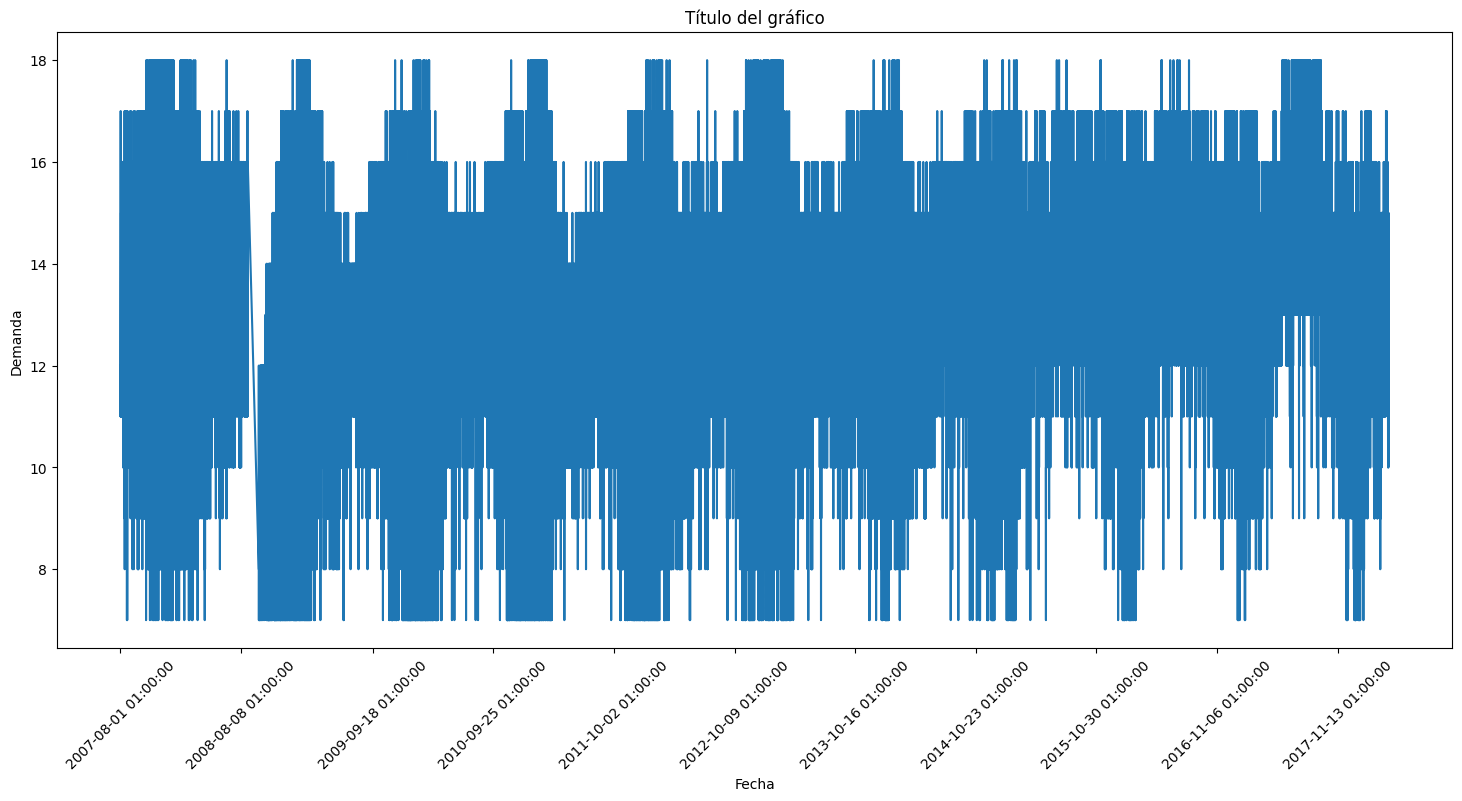

,demanda
fecha,
2007-08-01 01:00:00,12.0
2007-08-01 02:00:00,12.0
2007-08-01 03:00:00,11.0
2007-08-01 04:00:00,11.0
2007-08-01 05:00:00,11.0
...,...
2018-04-18 20:00:00,14.0
2018-04-18 21:00:00,15.0
2018-04-18 22:00:00,15.0


In [79]:
 #convertir la columna 'fecha' a formato de fecha y hora
df_final['fecha'] = pd.to_datetime(df_final['fecha'], format="'%d-%b-%Y %H:%M:%S'")
# convertir la columna 'fecha' a formato de fecha y hora
df_final['fecha'] = pd.to_datetime(df_final['fecha'])
# establecer la columna 'fecha' como el índice del DataFrame
df_final = df_final.set_index('fecha')
# Crear una figura y un eje
fig, ax = plt.subplots()

# Graficar los datos
demanda=df_final['demanda'].values
ax.plot(df_final.index,demanda )

# Establecer la frecuencia y el formato de los valores del eje x
ax.set_xticks(df_final.index[::8928])
ax.set_xticklabels(df_final.index[::8928], rotation=45)

# Agregar etiquetas a los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda')

# Agregar un título al gráfico
ax.set_title('Título del gráfico')

# Mostrar el gráfico
plt.show()
df_final

In [80]:
# Acotar el DataFrame a un rango de fechas específico
fecha_inicial = '2007-01-01 00:00:00'
fecha_final = '2018-01-01 00:00:00'
df_acotado = df_final.loc[(df_final.index >= fecha_inicial) & (df_final.index <= fecha_final)]
# Resetear el índice y convertir la columna de fechas en una columna del DataFrame
df_acotado = df_acotado.reset_index(drop=False)

# Renombrar la columna 'index' a un nombre más apropiado
df = df.rename(columns={'index': 'fecha'})
print(df_acotado)
print(df_acotado.columns)

                    fecha  demanda
0     2007-08-01 01:00:00     12.0
1     2007-08-01 02:00:00     12.0
2     2007-08-01 03:00:00     11.0
3     2007-08-01 04:00:00     11.0
4     2007-08-01 05:00:00     11.0
...                   ...      ...
90451 2017-12-31 20:00:00     11.0
90452 2017-12-31 21:00:00     10.0
90453 2017-12-31 22:00:00     10.0
90454 2017-12-31 23:00:00     10.0
90455 2018-01-01 00:00:00      9.0

[90456 rows x 2 columns]
Index(['fecha', 'demanda'], dtype='object')


In [81]:
#Agrupar por año y seleccionar solo las filas del 1 de enero de cada año
df_1_enero = df_acotado[df_acotado['fecha'].dt.month == 1].groupby(df_acotado['fecha'].dt.year)
# Seleccionar las primeras 24 filas de cada grupo
df_24h_enero = df_1_enero.head(24)

# reset index
df_24h_enero.reset_index(drop=True,inplace=True)
# Reindexar con nuevo rango de índices:
df_24h_enero =df_24h_enero.reindex(range(1, len(df_24h_enero)+2 ))
 #Eliminar las últimas 2 filas con .iloc[:N]
df_24h_enero = df_24h_enero.iloc[:-2]
display(df_24h_enero)

,fecha,demanda
1,2008-01-01 01:00:00,9.0
2,2008-01-01 02:00:00,9.0
3,2008-01-01 03:00:00,8.0
4,2008-01-01 04:00:00,8.0
5,2008-01-01 05:00:00,8.0
...,...,...
236,2017-01-01 20:00:00,12.0
237,2017-01-01 21:00:00,12.0
238,2017-01-01 22:00:00,12.0
239,2017-01-01 23:00:00,12.0


                  fecha  demanda
1   2008-01-01 01:00:00      9.0
2   2008-01-01 02:00:00      9.0
3   2008-01-01 03:00:00      8.0
4   2008-01-01 04:00:00      8.0
5   2008-01-01 05:00:00      8.0
..                  ...      ...
236 2017-01-01 20:00:00     12.0
237 2017-01-01 21:00:00     12.0
238 2017-01-01 22:00:00     12.0
239 2017-01-01 23:00:00     12.0
240 2018-01-01 00:00:00      9.0

[240 rows x 2 columns]


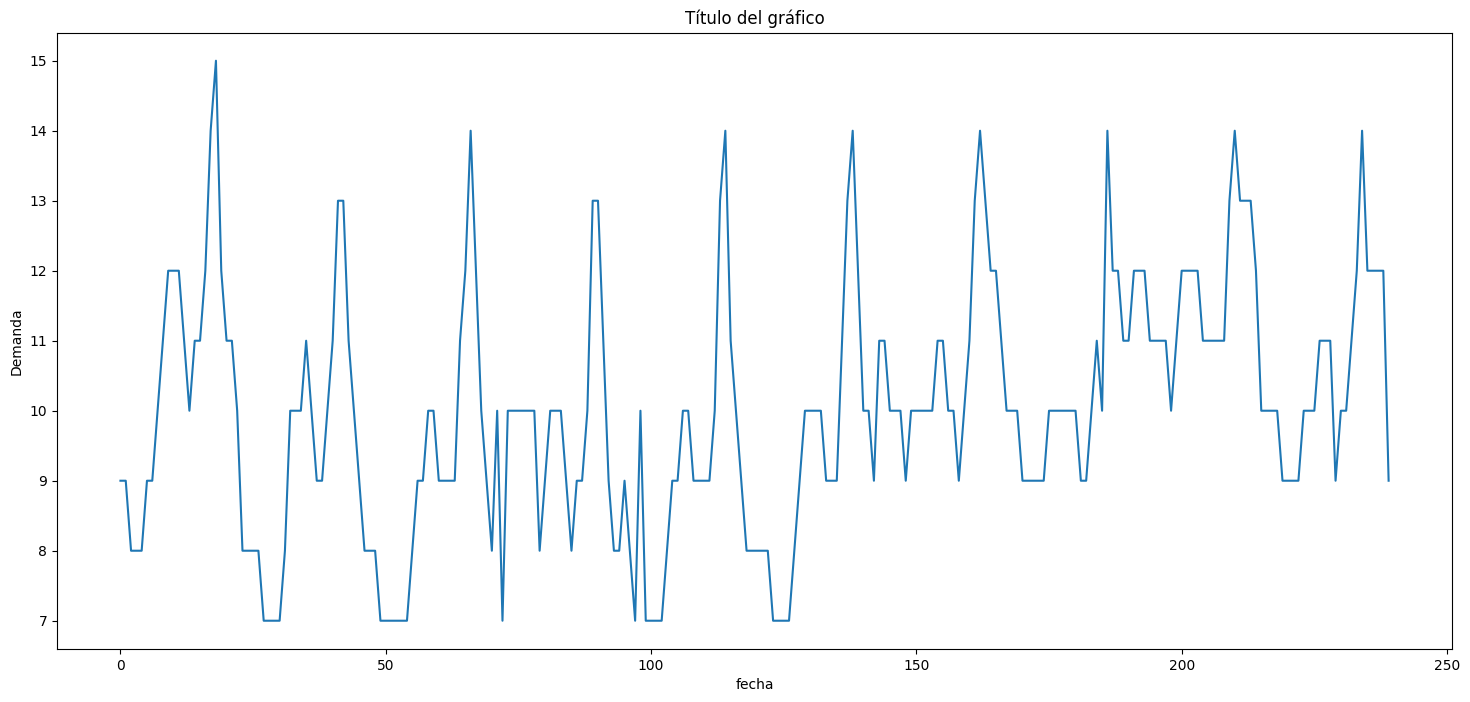

In [82]:
print(df_24h_enero)
# Crear un objeto para graficar los datos
fig, ax = plt.subplots()

# Graficar los datos
arr=df_24h_enero['demanda'].values

ax.plot(arr )

# Agregar etiquetas a los ejes
# Seleccionar las fechas que se mostrarán en la etiqueta del eje x
# Agregar las etiquetas del eje x
ax.set_xlabel('fecha')
ax.set_ylabel('Demanda')

# Agregar un título al gráfico
ax.set_title('Título del gráfico')

# Mostrar el gráfico
plt.show()

In [83]:
df_24h_enero.describe(include='all')

,fecha,demanda
count,240,240.000000
mean,2012-07-17 16:48:00,10.008333
min,2008-01-01 01:00:00,7.000000
25%,2010-01-01 12:45:00,9.000000
50%,2013-01-01 00:30:00,10.000000
75%,2015-01-01 12:15:00,11.000000
max,2018-01-01 00:00:00,15.000000
std,NaN,1.740465


In [84]:
print(f'Time period start : {df_24h_enero.fecha.min()}\nTime period end : {df_24h_enero.fecha.max()}')

Time period start : 2008-01-01 01:00:00
Time period end : 2018-01-01 00:00:00


In [85]:
df_24h_enero.columns,df_24h_enero.shape
df_24h_enero

,fecha,demanda
1,2008-01-01 01:00:00,9.0
2,2008-01-01 02:00:00,9.0
3,2008-01-01 03:00:00,8.0
4,2008-01-01 04:00:00,8.0
5,2008-01-01 05:00:00,8.0
...,...,...
236,2017-01-01 20:00:00,12.0
237,2017-01-01 21:00:00,12.0
238,2017-01-01 22:00:00,12.0
239,2017-01-01 23:00:00,12.0


In [86]:
# Converting year column to datetime format
df_24h_enero['fecha'] = pd.to_datetime(df_24h_enero['fecha'], format = '%Y-%m-%d-%h')
df_24h_enero

,fecha,demanda
1,2008-01-01 01:00:00,9.0
2,2008-01-01 02:00:00,9.0
3,2008-01-01 03:00:00,8.0
4,2008-01-01 04:00:00,8.0
5,2008-01-01 05:00:00,8.0
...,...,...
236,2017-01-01 20:00:00,12.0
237,2017-01-01 21:00:00,12.0
238,2017-01-01 22:00:00,12.0
239,2017-01-01 23:00:00,12.0


In [87]:
# Setting year as index for easier manipulations
y = df_24h_enero.set_index('fecha')
y,y.index,y

(                     demanda
 fecha                       
 2008-01-01 01:00:00      9.0
 2008-01-01 02:00:00      9.0
 2008-01-01 03:00:00      8.0
 2008-01-01 04:00:00      8.0
 2008-01-01 05:00:00      8.0
 ...                      ...
 2017-01-01 20:00:00     12.0
 2017-01-01 21:00:00     12.0
 2017-01-01 22:00:00     12.0
 2017-01-01 23:00:00     12.0
 2018-01-01 00:00:00      9.0
 
 [240 rows x 1 columns],
 DatetimeIndex(['2008-01-01 01:00:00', '2008-01-01 02:00:00',
                '2008-01-01 03:00:00', '2008-01-01 04:00:00',
                '2008-01-01 05:00:00', '2008-01-01 06:00:00',
                '2008-01-01 07:00:00', '2008-01-01 08:00:00',
                '2008-01-01 09:00:00', '2008-01-01 10:00:00',
                ...
                '2017-01-01 15:00:00', '2017-01-01 16:00:00',
                '2017-01-01 17:00:00', '2017-01-01 18:00:00',
                '2017-01-01 19:00:00', '2017-01-01 20:00:00',
                '2017-01-01 21:00:00', '2017-01-01 22:00:00',
     

                     demanda
fecha                       
2008-01-01 01:00:00      9.0
2008-01-01 02:00:00      9.0
2008-01-01 03:00:00      8.0
2008-01-01 04:00:00      8.0
2008-01-01 05:00:00      8.0
...                      ...
2017-01-01 20:00:00     12.0
2017-01-01 21:00:00     12.0
2017-01-01 22:00:00     12.0
2017-01-01 23:00:00     12.0
2018-01-01 00:00:00      9.0

[240 rows x 1 columns]


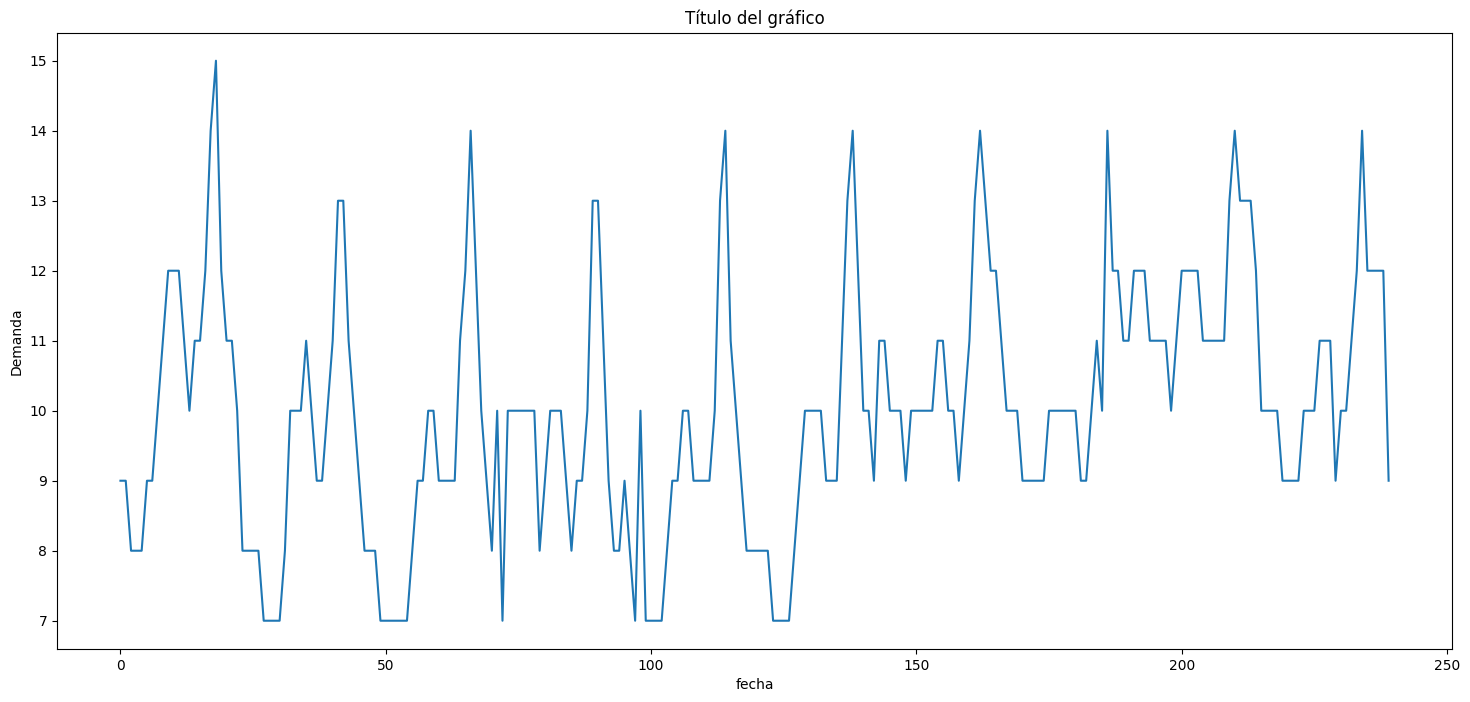

In [88]:
print(y)
# Crear un objeto para graficar los datos
fig, ax = plt.subplots()

# Graficar los datos
arr=y['demanda'].values

ax.plot(arr )

# Agregar etiquetas a los ejes
# Seleccionar las fechas que se mostrarán en la etiqueta del eje x
# Agregar las etiquetas del eje x
ax.set_xlabel('fecha')
ax.set_ylabel('Demanda')

# Agregar un título al gráfico
ax.set_title('Título del gráfico')

# Mostrar el gráfico
plt.show()

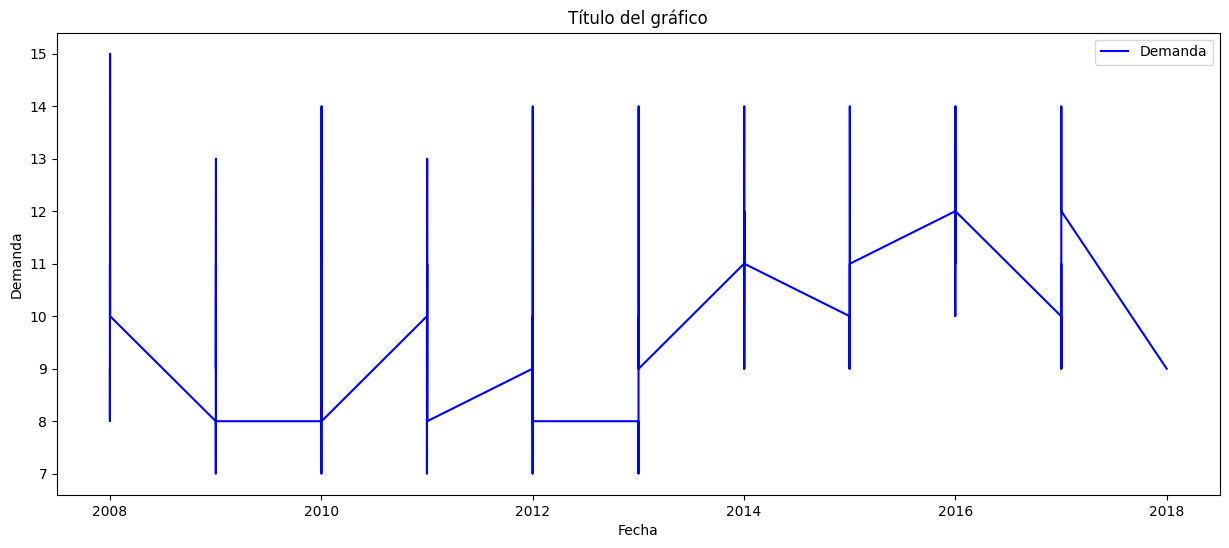

In [89]:
# Graficar los datos directamente sin crear fig, ax
plt.figure(figsize=(15, 6))  # Tamaño de la figura

# Graficar los datos utilizando plot
plt.plot(y.index, y['demanda'], label='Demanda', color='blue')

# Etiquetas de los ejes
plt.xlabel('Fecha')
plt.ylabel('Demanda')

# Título del gráfico
plt.title('Título del gráfico')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [90]:
# Null values check
y.isnull().sum()
y

,demanda
fecha,
2008-01-01 01:00:00,9.0
2008-01-01 02:00:00,9.0
2008-01-01 03:00:00,8.0
2008-01-01 04:00:00,8.0
2008-01-01 05:00:00,8.0
...,...
2017-01-01 20:00:00,12.0
2017-01-01 21:00:00,12.0
2017-01-01 22:00:00,12.0


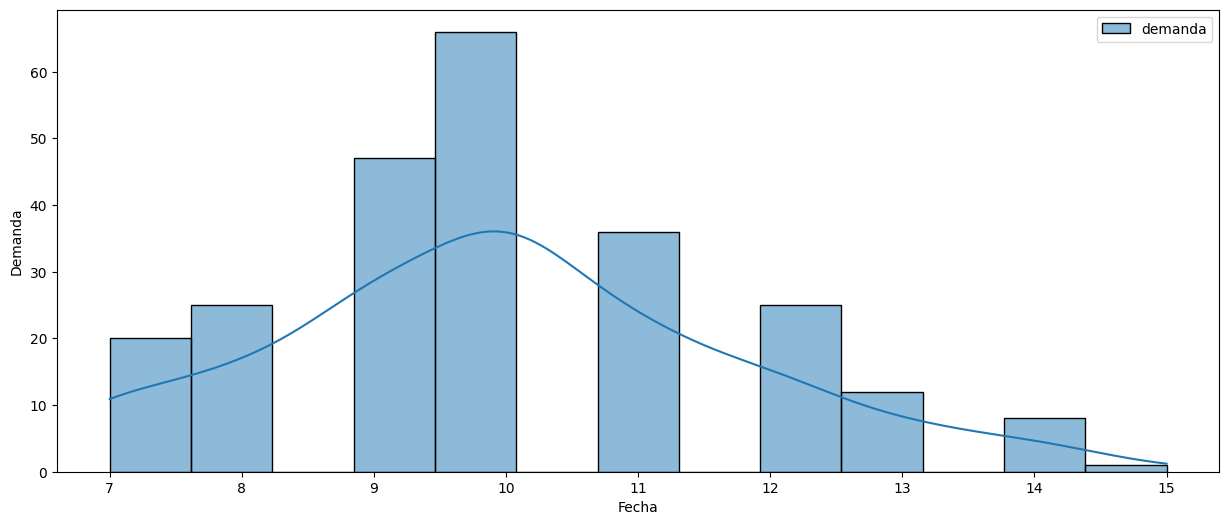

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes explícitamente
fig, ax = plt.subplots(figsize=(15, 6))

# Density Plot usando Seaborn
sns.histplot(y, kde=True, ax=ax)

# Etiquetas de los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda')

# Mostrar el gráfico
plt.show()


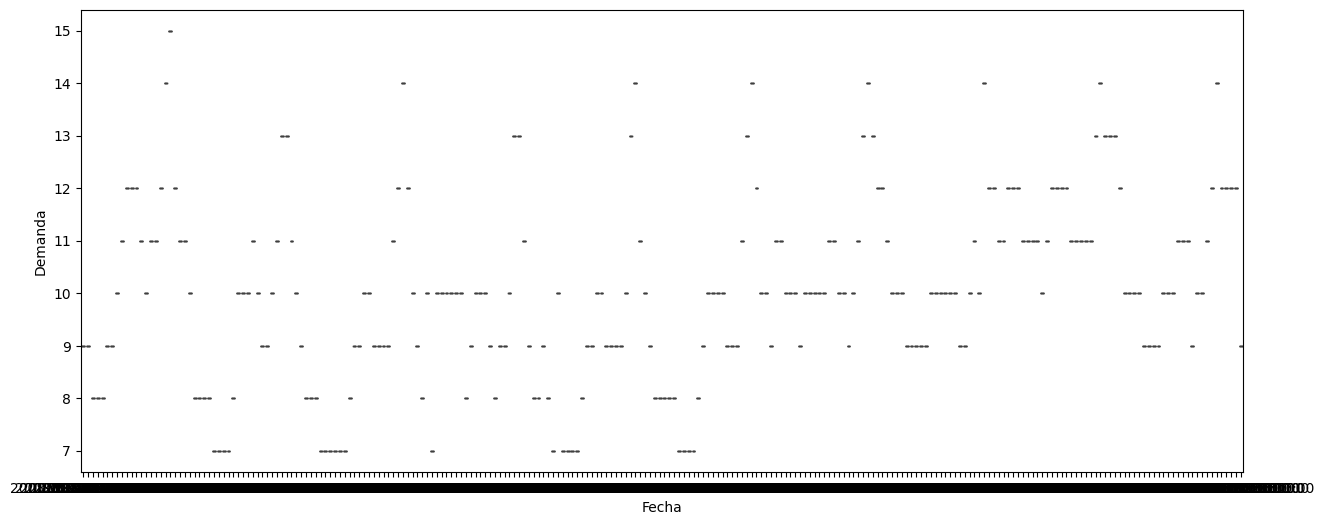

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y ejes explícitamente
fig, ax = plt.subplots(figsize=(15, 6))

# Boxplot usando Seaborn
sns.boxplot(x=y.index, y=y['demanda'], ax=ax)

# Etiquetas de los ejes
ax.set_xlabel('Fecha')
ax.set_ylabel('Demanda')

# Mostrar el gráfico
plt.show()


In [93]:
help(sm.tsa.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

<Figure size 1800x800 with 0 Axes>

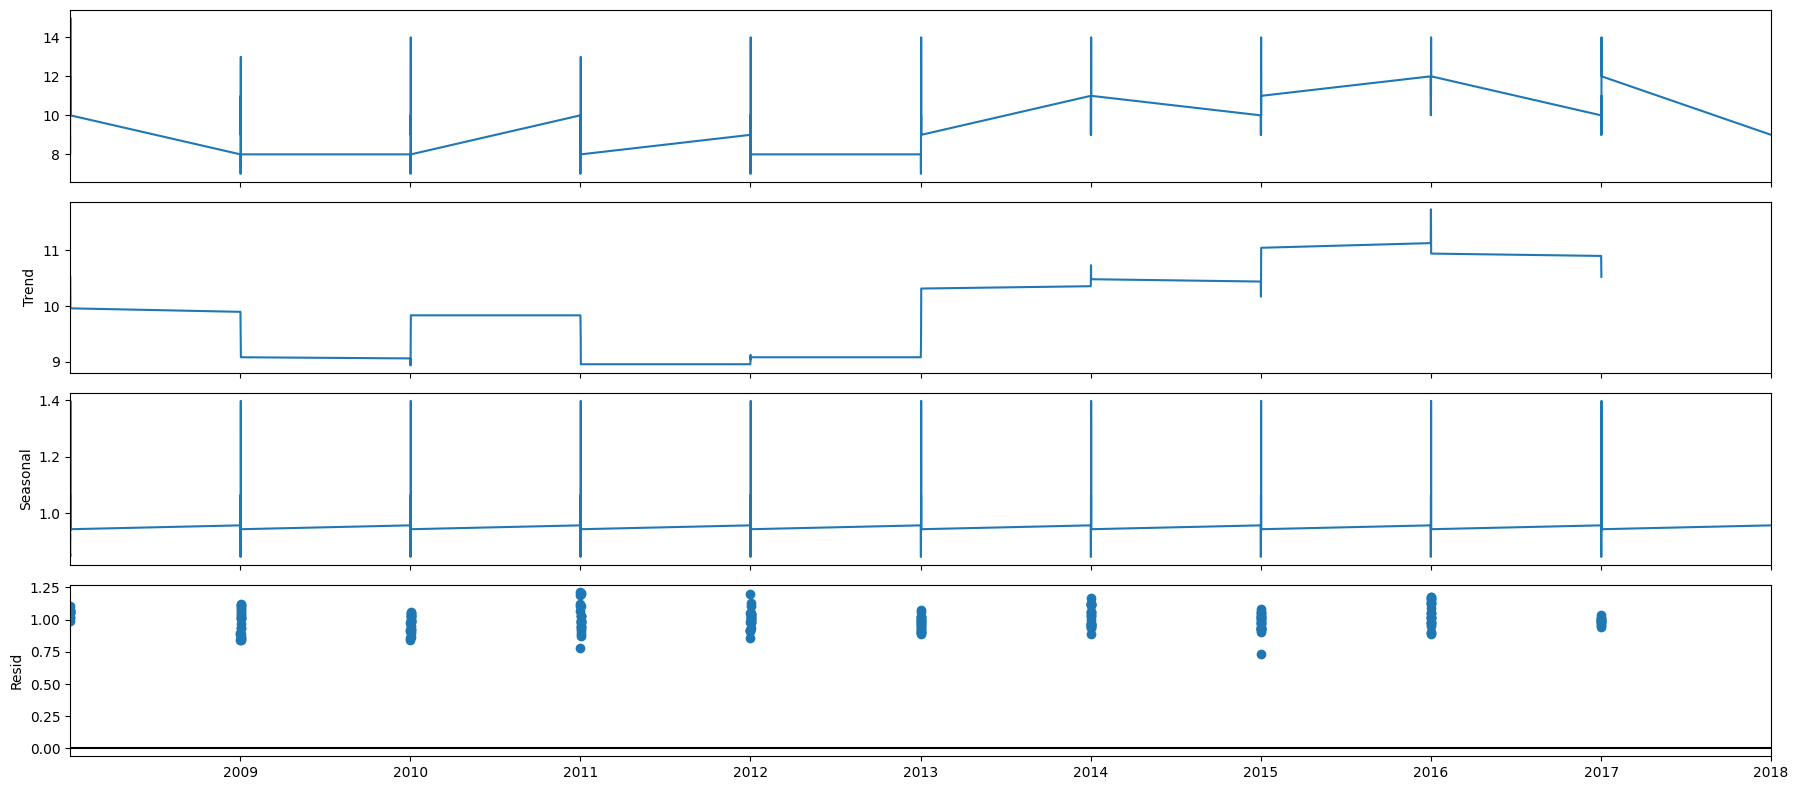

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',period=24)
plt.figure(figsize = (18,8))
decomposition.plot()
plt.show()

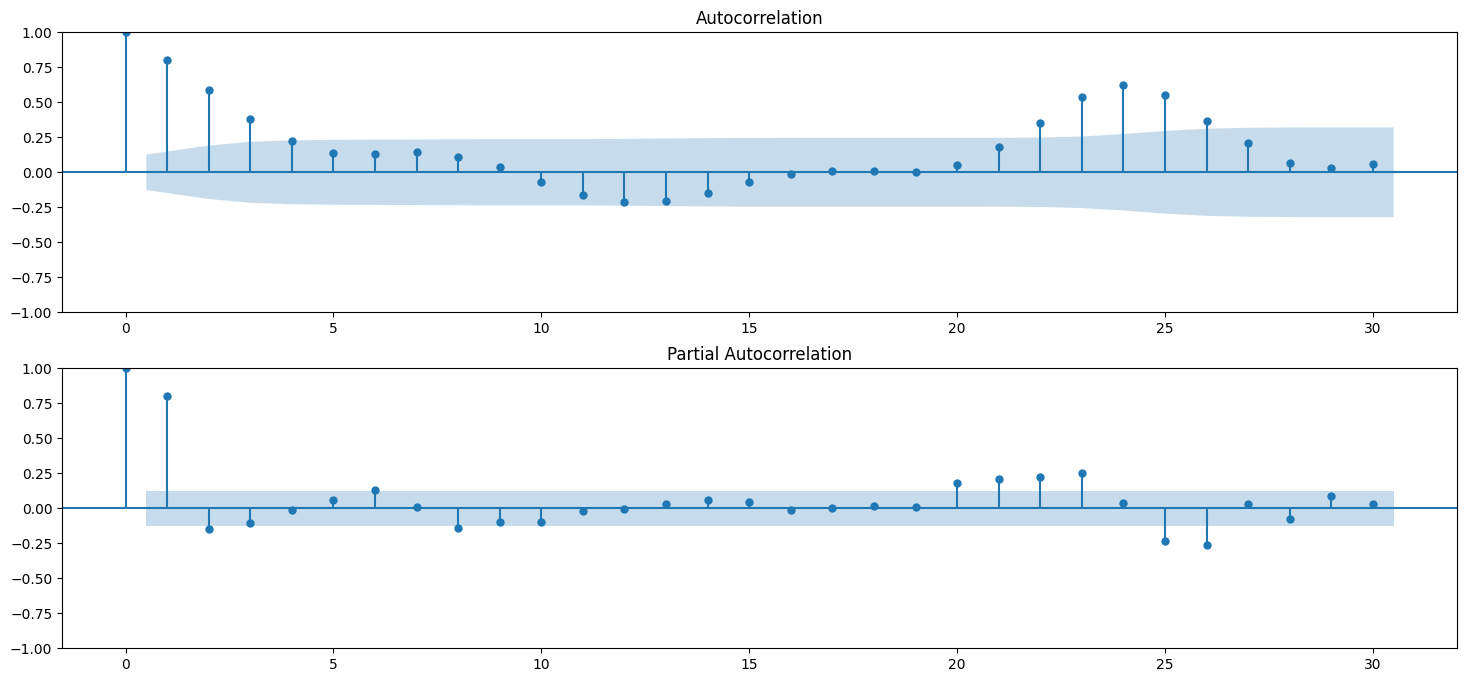

In [95]:
# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(y['demanda'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(y['demanda'], ax=plt.gca(), lags = 30)
plt.show()

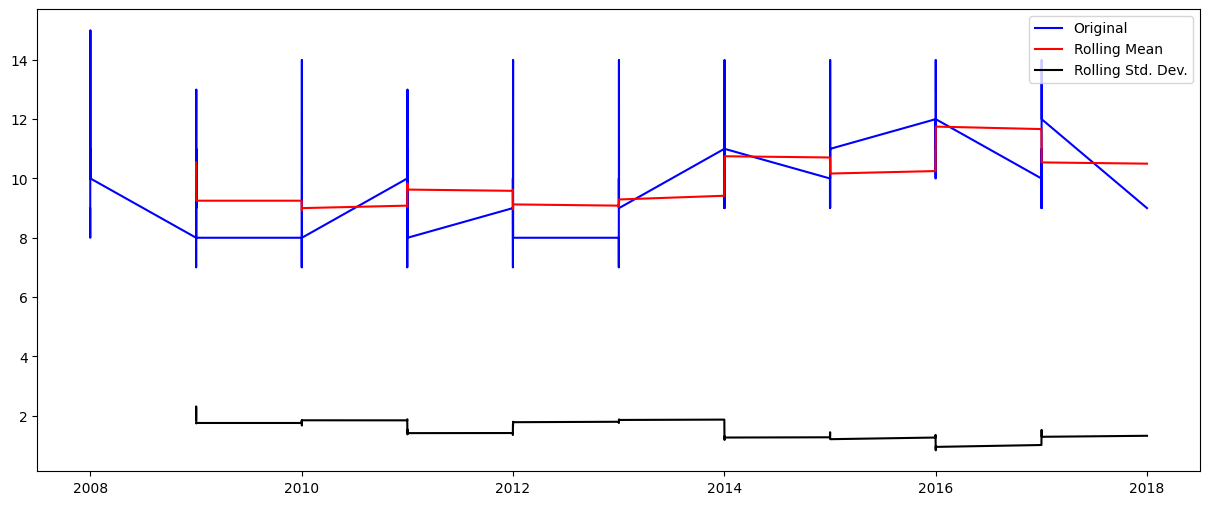

In [96]:
# Rolling Mean & Rolling Standard Deviation
rolmean = y.rolling(window = 24).mean() # Calcula con periodo windows la media movil 
rolstd = y.rolling(window = 24).std() # caclula la desviacino estandar movil segun la  windows 

plt.figure(figsize = (15,6))
orig = plt.plot(y, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

<Figure size 1500x600 with 0 Axes>

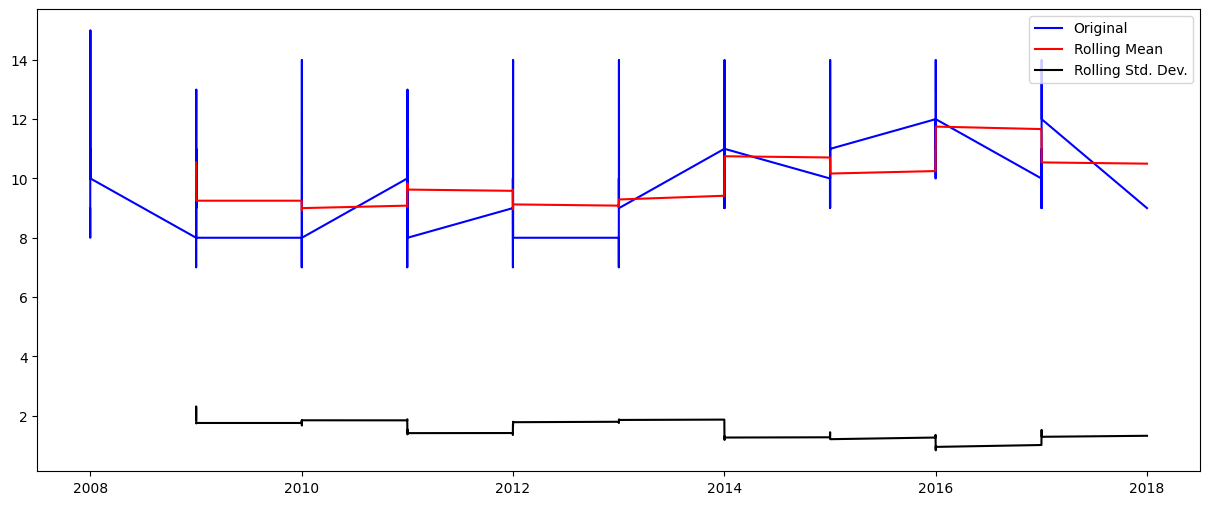

In [97]:
plt.figure(figsize=(15, 6))

# Crear una figura y ejes explícitamente
fig, ax = plt.subplots(figsize=(15, 6))

# Graficar la serie temporal original
orig = ax.plot(y, color='blue', label='Original')

# Graficar la media móvil
mean = ax.plot(rolmean, color='red', label='Rolling Mean')

# Graficar la desviación estándar móvil
std = ax.plot(rolstd, color='black', label='Rolling Std. Dev.')

# Agregar leyenda
ax.legend(loc='best')

# Mostrar el gráfico
plt.show()


In [98]:
# Creating general function to test stationarity of a time series
   
def test_stationarity(timeseries):
    B = timeseries.iloc[:, 0]
    B = B.reset_index(drop=True)
    # Rolling Mean & Rolling Standard Deviation
    rolmean = timeseries.rolling(window = 24).mean()
    rolstd = timeseries.rolling(window = 24).std()

    plt.figure(figsize = (15,6))
    orig = plt.plot(timeseries, color = 'blue', label ='Original')
    mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
    plt.legend(loc = 'best')
    plt.show()
    
    # Augmented Dicky-Fuller Test
    print('-------------Results of Dicky Fuller Test -------------')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                     'No. of Lags used', 'No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    dfoutput['Maximized AIC:'] = dftest[5]
    print(dfoutput)
    if dftest[1]>0.05 :
            print("the null hypothesis is fulfilled for no stationary series ")
    else:
        print("the  hypothesis is fulfilled for  stationary series ")
    
     #! Agree the Levene test
    # Divide the data into three equal parts
    
    if len(B)//2==0 :
        part_size = len(B) // 2
        seg1 = B[:part_size]
        seg2 = B[2*part_size:]
            # # Apply the levene test to each pair of segments
        resultado_levene_seg1_seg2 = levene(seg1, seg2)
    # Apply the levene test to each pair of segments
         # # Print the results
        print("Valor p de la prueba de levene para seg1 y seg2:", resultado_levene_seg1_seg2.pvalue)
        if resultado_levene_seg1_seg2.pvalue < 0.05:
            print('La serie no es estacionaria en VARIANZA')
        else:
            print('La serie es estacionaria en VARIANZA')
    else:
    # Adjust the parts size if needed to make them approximately equal
        part_size = len(B) // 3
        # Divide the series into three parts
        seg1 = B[:part_size]
        seg2 = B[part_size:2*part_size]
        seg3 = B[2*part_size:]
        print(seg3)
        # Apply the levene test to each pair of segments
        resultado_levene_seg1_seg2 = levene(seg1, seg2)
        resultado_levene_seg2_seg3 = levene(seg2, seg3)
        resultado_levene_seg3_seg1 = levene(seg3, seg1)

        # Print the results
        print("Valor p de la prueba de levene para seg1 y seg2:", resultado_levene_seg1_seg2.pvalue)
        print("Valor p de la prueba de levene para seg2 y seg3:", resultado_levene_seg2_seg3.pvalue)
        print("Valor p de la prueba de levene para seg3 y seg1:", resultado_levene_seg3_seg1.pvalue)

        if resultado_levene_seg1_seg2.pvalue < 0.05 and resultado_levene_seg2_seg3.pvalue < 0.05 and resultado_levene_seg3_seg1.pvalue < 0.05:
            print('La serie no es estacionaria en VARIANZA')
        else:
            print('La serie es estacionaria en VARIANZA')


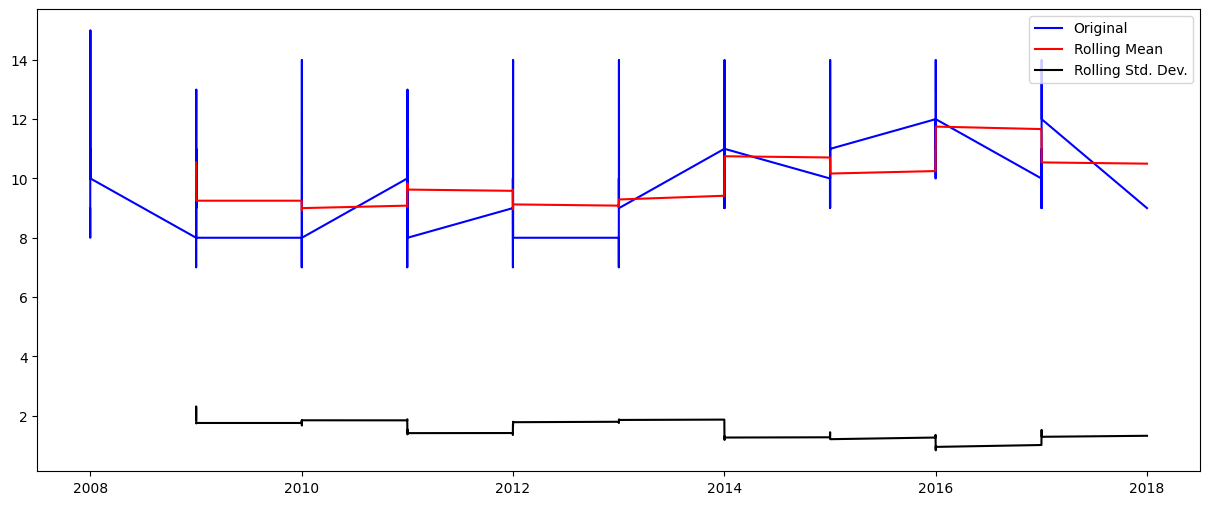

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                        -5.956493e+00
p-value : MacKinnon's approximate p-value    2.087273e-07
No. of Lags used                             2.000000e+00
No. of observations used                     2.370000e+02
Critical Value (1%)                         -3.458247e+00
Critical Value (5%)                         -2.873814e+00
Critical Value (10%)                        -2.573311e+00
Maximized AIC:                               6.620049e+02
dtype: float64
the  hypothesis is fulfilled for  stationary series 
160    11.0
161    13.0
162    14.0
163    13.0
164    12.0
       ... 
235    12.0
236    12.0
237    12.0
238    12.0
239     9.0
Name: demanda, Length: 80, dtype: float64
Valor p de la prueba de levene para seg1 y seg2: 0.15334903638327357
Valor p de la prueba de levene para seg2 y seg3: 0.39742284017082885
Valor p de la prueba de levene para seg3 y seg1: 0.02009180942452471
La serie es estacionaria en VAR

In [99]:
# Stationarity test of log transformed TS
test_stationarity(y)

In [106]:
# Splitting TS data into train and test set for model training and testing


train_ts = y.iloc[: 120,]
test_ts = y.iloc[120: ,]
test_ts.isnull().sum()
len(y)
len(test_ts)

120

In [107]:
# Auto arima: seleccion basada en AIC
# ==============================================================================
modelo = auto_arima(
            y                 = test_ts,
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            seasonal          = True,
            test              = 'adf',
            m                 = 24, # periodicidad de la estacionalidad
            d                 = None, # El algoritmo determina 'd'
            D                 = None, # El algoritmo determina 'D'
            trace             = True,
            error_action      = 'ignore',
            suppress_warnings = True,
            stepwise          = True,
            random_state      =4,
            n_fits            =15000
)
print(modelo.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[24] intercept   : AIC=410.043, Time=1.53 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=446.217, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=318.309, Time=0.70 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=373.776, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=909.575, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=330.956, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=305.485, Time=1.43 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=307.429, Time=3.77 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=308.390, Time=1.71 sec
 ARIMA(0,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(1,0,1)(2,0,0)[24] intercept   : AIC=306.927, Time=2.44 sec
 ARIMA(0,0,1)(2,0,0)[24] intercept   : AIC=343.436, Time=1.81 sec
 ARIMA(2,0,1)(2,0,0)[24] intercept   : AIC=308.405, Time=3.29 sec
 ARIMA(1,0,0)(2,0,0)[24]             : AI

In [ ]:

model = ARIMA(train_ts, order = (2,0,0), seasonal_order=(1,0,2,24))
results = model.fit()
print(results.summary())

                                       SARIMAX Results                                       
Dep. Variable:                               demanda   No. Observations:                  120
Model:             ARIMA(2, 0, 0)x(1, 0, [1, 2], 24)   Log Likelihood                -160.165
Date:                               Wed, 08 May 2024   AIC                            334.330
Time:                                       21:39:38   BIC                            353.843
Sample:                                            0   HQIC                           342.254
                                               - 120                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5222      1.190      8.000      0.000       7.189      11.855
ar.L1      

In [ ]:
# Obtén las predicciones para el conjunto de prueba
# predictions = modelo.predict(n_periods=24)
predictions_test_=modelo.predict(len(test_ts))
# Crea un DataFrame con las fechas y las predicciones
predictions_df = pd.DataFrame(index=test_ts.index)
predictions_df['Predictions'] = predictions_test_.values  # Asegúrate de extraer los valores

# Asegúrate de que el índice del DataFrame sea de tipo datetime
predictions_df.index = pd.to_datetime(predictions_df.index)

# Imprime el DataFrame con las predicciones
print(predictions_df)

# Describe el DataFrame con las predicciones
predictions_df.describe()


                     Predictions
fecha                           
2017-01-01 01:00:00     7.351032
2017-01-01 02:00:00     7.772580
2017-01-01 03:00:00     8.534170
2017-01-01 04:00:00     7.776001
2017-01-01 05:00:00     7.850819
2017-01-01 06:00:00     8.001485
2017-01-01 07:00:00     8.048625
2017-01-01 08:00:00     8.228071
2017-01-01 09:00:00     9.251912
2017-01-01 10:00:00     9.610591
2017-01-01 11:00:00    10.043162
2017-01-01 12:00:00    10.181625
2017-01-01 13:00:00     9.323334
2017-01-01 14:00:00     8.876109
2017-01-01 15:00:00     9.219479
2017-01-01 16:00:00     9.349848
2017-01-01 17:00:00    10.398619
2017-01-01 18:00:00    12.460344
2017-01-01 19:00:00    13.142488
2017-01-01 20:00:00    11.072944
2017-01-01 21:00:00     9.794239
2017-01-01 22:00:00     9.022155
2017-01-01 23:00:00     8.402993
2018-01-01 00:00:00     8.813751


,Predictions
count,24.000000
mean,9.271932
std,1.438685
min,7.351032
25%,8.183210
50%,9.120817
75%,9.856470
max,13.142488


NameError: name 'predictions' is not defined

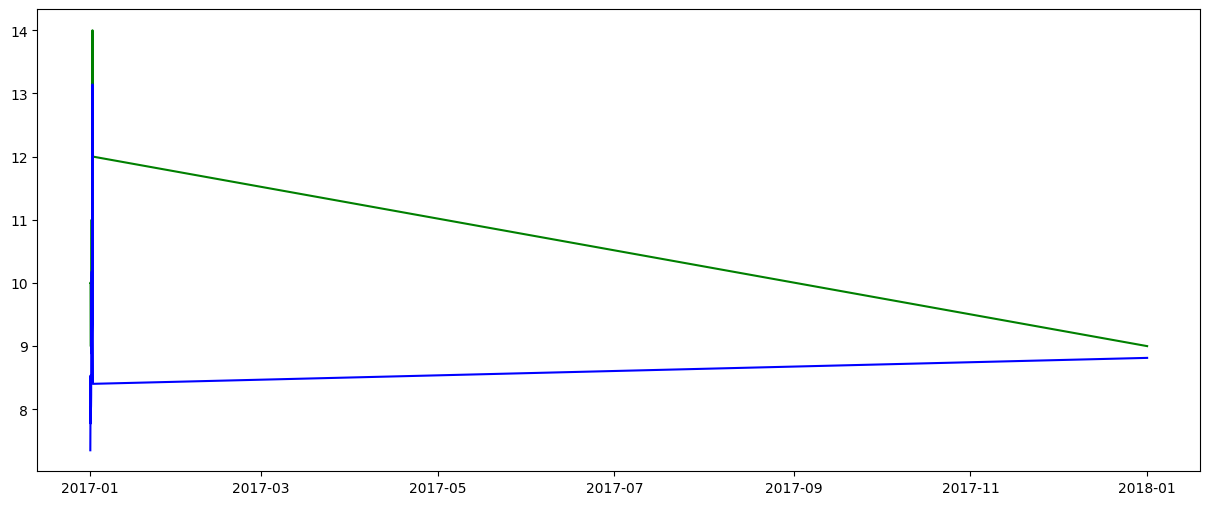

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(test_ts, color = 'green', label = 'Log Transformed Original data')
plt.plot(predictions_df, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(predictions, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Month')
plt.ylabel('Log of no. of passengers')
plt.title('ARIMA(3,2,2)(0,1,0)[12] qualitative performance')
plt.legend(loc = 'best')
plt.show()